The goal of this project is to do feature engineering, data preprocessing and EDA to prepare data for building a machine learning model that predicts the next's day tempreture.

In [10]:
#reading the csv file
import pandas as pd
import numpy as np
data = pd.read_csv("M1 Forecast_Data_Set.csv")

data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [14]:
#handling missing values and replace them with their mean or median and drop the rest( ex for date we can't do mean or median)


data["Present_Tmax"] = data["Present_Tmax"].replace(np.nan, (data["Present_Tmax"].mean()))
data["Present_Tmin"] = data["Present_Tmin"].replace(np.nan, (data["Present_Tmin"].mean()))
data["LDAPS_RHmin"] = data["LDAPS_RHmin"].replace(np.nan, (data["LDAPS_RHmin"].median()))
data["LDAPS_RHmax"] = data["LDAPS_RHmax"].replace(np.nan, (data["LDAPS_RHmax"].median()))
data["LDAPS_Tmax_lapse"] = data["LDAPS_Tmax_lapse"].replace(np.nan, data["LDAPS_Tmax_lapse"].mean())
data["LDAPS_Tmin_lapse"] = data["LDAPS_Tmin_lapse"].replace(np.nan, data["LDAPS_Tmin_lapse"].mean())
data["LDAPS_WS"] = data["LDAPS_WS"].replace(np.nan, data["LDAPS_WS"].mean())
data["LDAPS_LH"] = data["LDAPS_LH"].replace(np.nan, data["LDAPS_LH"].mean())
data["LDAPS_CC1"] = data["LDAPS_CC1"].replace(np.nan, data["LDAPS_CC1"].median())
data["LDAPS_CC2"] = data["LDAPS_CC2"].replace(np.nan, data["LDAPS_CC2"].median())
data["LDAPS_CC3"] = data["LDAPS_CC3"].replace(np.nan, data["LDAPS_CC3"].median())
data["LDAPS_CC4"] = data["LDAPS_CC4"].replace(np.nan, data["LDAPS_CC4"].median())
data["LDAPS_PPT1"] = data["LDAPS_PPT1"].replace(np.nan, data["LDAPS_PPT1"].median())
data["LDAPS_PPT2"] = data["LDAPS_PPT2"].replace(np.nan, data["LDAPS_PPT2"].median())
data["LDAPS_PPT3"] = data["LDAPS_PPT3"].replace(np.nan, data["LDAPS_PPT3"].median())
data["LDAPS_PPT4"] = data["LDAPS_PPT4"].replace(np.nan, data["LDAPS_PPT4"].median())
data["Next_Tmax"] = data["Next_Tmax"].replace(np.nan, data["Next_Tmax"].mean())
data["Next_Tmin"] = data["Next_Tmin"].replace(np.nan, data["Next_Tmin"].mean())
data.dropna(inplace = True)

data.isnull().sum()

,0
station,0
Date,0
Present_Tmax,0
Present_Tmin,0
LDAPS_RHmin,0
LDAPS_RHmax,0
LDAPS_Tmax_lapse,0
LDAPS_Tmin_lapse,0
LDAPS_WS,0
LDAPS_LH,0


# New Section

In [21]:
#Verify the dataset for any duplicated rows. If duplicates are identified, eliminate them.
data.drop_duplicates()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [16]:
#normalizing the features from scale [0-1]
# we don't normalize station and date because they're considered catigorical
# we usually don'y normalize the target ( next day min and next day max)

data["Present_Tmax"] = (data["Present_Tmax"] - data["Present_Tmax"].min()) / (data["Present_Tmax"].max() - data["Present_Tmax"].min())
data["Present_Tmin"] = (data["Present_Tmin"] - data["Present_Tmin"].min()) / (data["Present_Tmin"].max() - data["Present_Tmin"].min())
data["LDAPS_RHmin"] = (data["LDAPS_RHmin"] - data["LDAPS_RHmin"].min()) / (data["LDAPS_RHmin"].max() - data["LDAPS_RHmin"].min())
data["LDAPS_RHmax"] = (data["LDAPS_RHmax"] - data["LDAPS_RHmax"].min()) / (data["LDAPS_RHmax"].max() - data["LDAPS_RHmax"].min())
data["LDAPS_Tmax_lapse"] = (data["LDAPS_Tmax_lapse"] - data["LDAPS_Tmax_lapse"].min()) / (data["LDAPS_Tmax_lapse"].max() - data["LDAPS_Tmax_lapse"].min())
data["LDAPS_Tmin_lapse"] = (data["LDAPS_Tmin_lapse"] - data["LDAPS_Tmin_lapse"].min()) / (data["LDAPS_Tmin_lapse"].max() - data["LDAPS_Tmin_lapse"].min())
data["LDAPS_WS"] = (data["LDAPS_WS"] - data["LDAPS_WS"].min()) / (data["LDAPS_WS"].max() - data["LDAPS_WS"].min())
data["LDAPS_LH"] = (data["LDAPS_LH"] - data["LDAPS_LH"].min()) / (data["LDAPS_LH"].max() - data["LDAPS_LH"].min())
data["LDAPS_CC1"] = (data["LDAPS_CC1"] - data["LDAPS_CC1"].min()) / (data["LDAPS_CC1"].max() - data["LDAPS_CC1"].min())
data["LDAPS_CC2"] = (data["LDAPS_CC2"] - data["LDAPS_CC2"].min()) / (data["LDAPS_CC2"].max() - data["LDAPS_CC2"].min())
data["LDAPS_CC3"] = (data["LDAPS_CC3"] - data["LDAPS_CC3"].min()) / (data["LDAPS_CC3"].max() - data["LDAPS_CC3"].min())
data["LDAPS_CC4"] = (data["LDAPS_CC4"] - data["LDAPS_CC4"].min()) / (data["LDAPS_CC4"].max() - data["LDAPS_CC4"].min())
data["LDAPS_PPT1"] = (data["LDAPS_PPT1"] - data["LDAPS_PPT1"].min()) / (data["LDAPS_PPT1"].max() - data["LDAPS_PPT1"].min())
data["LDAPS_PPT2"] = (data["LDAPS_PPT2"] - data["LDAPS_PPT2"].min()) / (data["LDAPS_PPT2"].max() - data["LDAPS_PPT2"].min())
data["LDAPS_PPT3"] = (data["LDAPS_PPT3"] - data["LDAPS_PPT3"].min()) / (data["LDAPS_PPT3"].max() - data["LDAPS_PPT3"].min())
data["LDAPS_PPT4"] = (data["LDAPS_PPT4"] - data["LDAPS_PPT4"].min()) / (data["LDAPS_PPT4"].max() - data["LDAPS_PPT4"].min())
data["lat"] = (data["lat"] - data["lat"].min()) / (data["lat"].max() - data["lat"].min())
data["lon"] = (data["lon"] - data["lon"].min()) / (data["lon"].max() - data["lon"].min())
data["DEM"] = (data["DEM"] - data["DEM"].min()) / (data["DEM"].max() - data["DEM"].min())
data["Slope"] = (data["Slope"] - data["Slope"].min()) / (data["Slope"].max() - data["Slope"].min())
data["Solar radiation"] = (data["Solar radiation"] - data["Solar radiation"].min()) / (data["Solar radiation"].max() - data["Solar radiation"].min())

data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,0.494318,0.543011,0.488518,0.783659,0.499546,0.569132,0.207447,0.365853,...,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.528870,1.000000,29.1,21.2
1,2.0,2013-06-30,0.676136,0.553763,0.412406,0.771200,0.584480,0.636121,0.148053,0.288703,...,0.0,0.0,0.0,0.786017,0.666667,0.161990,0.081816,0.925703,30.5,22.5
2,3.0,2013-06-30,0.659091,0.645161,0.367024,0.609716,0.595982,0.670697,0.171575,0.150545,...,0.0,0.0,0.0,0.643008,0.750809,0.104702,0.032994,0.922242,31.1,23.9
3,4.0,2013-06-30,0.681818,0.650538,0.488316,0.914366,0.577497,0.589934,0.145848,0.349446,...,0.0,0.0,0.0,1.000000,0.634304,0.166759,0.479615,0.918280,31.7,24.3
4,5.0,2013-06-30,0.647727,0.569892,0.462078,0.760251,0.549257,0.600379,0.150325,0.535505,...,0.0,0.0,0.0,0.500530,1.000000,0.113360,0.080123,0.919835,31.2,22.5


In [19]:
data.dtypes

,0
station,float64
Date,object
Present_Tmax,float64
Present_Tmin,float64
LDAPS_RHmin,float64
LDAPS_RHmax,float64
LDAPS_Tmax_lapse,float64
LDAPS_Tmin_lapse,float64
LDAPS_WS,float64
LDAPS_LH,float64


using label encoder to encode the station from float64 to an catgorical feature

In [22]:
# first we convert the station to string and then perform label encoder to assign each station to a unique number that machine learning algorithms can understand.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["station"] = le.fit_transform(data["station"].astype("str"))

data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,2013-06-30,0.494318,0.543011,0.488518,0.783659,0.499546,0.569132,0.207447,0.365853,...,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.528870,1.000000,29.1,21.2
1,18,2013-06-30,0.676136,0.553763,0.412406,0.771200,0.584480,0.636121,0.148053,0.288703,...,0.0,0.0,0.0,0.786017,0.666667,0.161990,0.081816,0.925703,30.5,22.5
2,2,2013-06-30,0.659091,0.645161,0.367024,0.609716,0.595982,0.670697,0.171575,0.150545,...,0.0,0.0,0.0,0.643008,0.750809,0.104702,0.032994,0.922242,31.1,23.9
3,3,2013-06-30,0.681818,0.650538,0.488316,0.914366,0.577497,0.589934,0.145848,0.349446,...,0.0,0.0,0.0,1.000000,0.634304,0.166759,0.479615,0.918280,31.7,24.3
4,5,2013-06-30,0.647727,0.569892,0.462078,0.760251,0.549257,0.600379,0.150325,0.535505,...,0.0,0.0,0.0,0.500530,1.000000,0.113360,0.080123,0.919835,31.2,22.5


Text(0.5, 1.0, 'heatmap showing the relationship between each catigory')

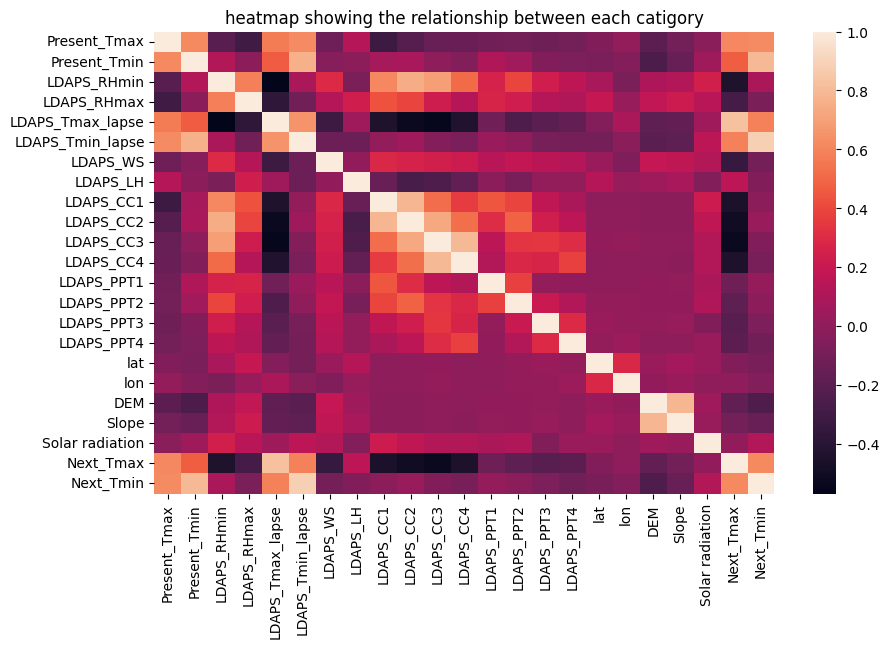

In [34]:
# we have to exclude the catigorical features to perform a heatmap:
import seaborn as sn # to import heatmap
import matplotlib.pyplot as plt


data.numeric = data.drop(columns = ["station", "Date"], errors = "ignore")
matrix = data.numeric.corr()
plt.figure(figsize = (10,6))
sn.heatmap(matrix)
plt.title("heatmap showing the relationship between each catigory")

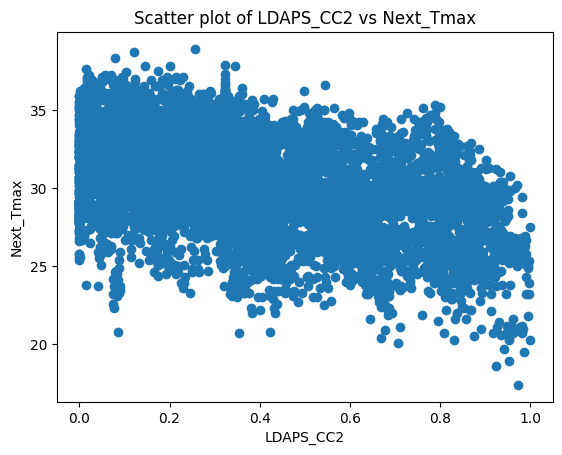

In [37]:
#scatterplot

plt.scatter(data["LDAPS_CC2"], data["Next_Tmax"])
plt.xlabel("LDAPS_CC2")
plt.ylabel("Next_Tmax")
plt.title("Scatter plot of LDAPS_CC2 vs Next_Tmax")
plt.show()

In [48]:
# Designate all features, excluding the two last columns ("Next_Tmax" and "Next_Tmin"), as X.
# creating another column "Next_Taverage" that calculates the average temperature
X = data.iloc[:, :-2].values

data["Next_Taverage"] = (data["Next_Tmax"] + data["Next_Tmin"])/2

Y = data["Next_Taverage"]

In [57]:
# now we remove correlated Variables:
#data = data.drop(columns = ["LDAPS_Tmin_lapse","LDAPS_Tmax_lapse"])
data.head()


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Next_Taverage
0,0,2013-06-30,0.494318,0.543011,0.488518,0.783659,0.207447,0.365853,0.241862,0.210559,...,0.0,0.0,0.786017,0.533981,1.000000,0.528870,1.000000,29.1,21.2,25.15
1,18,2013-06-30,0.676136,0.553763,0.412406,0.771200,0.148053,0.288703,0.233137,0.260000,...,0.0,0.0,0.786017,0.666667,0.161990,0.081816,0.925703,30.5,22.5,26.50
2,2,2013-06-30,0.659091,0.645161,0.367024,0.609716,0.171575,0.150545,0.216426,0.265884,...,0.0,0.0,0.643008,0.750809,0.104702,0.032994,0.922242,31.1,23.9,27.50
3,3,2013-06-30,0.681818,0.650538,0.488316,0.914366,0.145848,0.349446,0.223692,0.233388,...,0.0,0.0,1.000000,0.634304,0.166759,0.479615,0.918280,31.7,24.3,28.00
4,5,2013-06-30,0.647727,0.569892,0.462078,0.760251,0.150325,0.535505,0.156529,0.258165,...,0.0,0.0,0.500530,1.000000,0.113360,0.080123,0.919835,31.2,22.5,26.85
